# Structure of notebook:
- Import libraries
- Load data
#### Quick overview of all variables
- Profiling
- Pairplot
#### Step-by-step systematic and comprehensive EDA
1. Data type, data dimension
2. Uniqueness
3. Missing values
4. Descriptive stats and data distribution
5. Bivariate analysis: correlation amongst variables

## Import libraries

In [42]:
import sys
import importlib
sys.path.append('/Users/nbngu/Documents/Python learning/Machine learning material/all_projects/customised_functions')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas_profiling as pp

#### Packages used for statistical testing
from statsmodels.graphics.gofplots import qqplot

# Load utility functions
from data_processing import *
from statistical_test import *

%matplotlib inline

## Load data

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv") # Input raw data

# Quick overview of all variables
- There exists certain functions and packages such as sns.pairplot, or pandas-profiling that would give us a quick overview of the dataset.  
- However these packages lack flexibility and sometimes do not provide the deeper level of understanding that a more handson EDA approach offers. 

In [3]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
sns.pairplot(df)

# Step by step systematic and comprehensive EDA

## 1. Data type and dimension

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.dtypes   # df.info()

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df.shape

(5110, 12)

In [8]:
# Standardise datatype into numeric and categorical if necessary using dtype_standardise(df)
# df = dtype_standardise(df)

In [9]:
# Use a heuristic function to automatically identify continuous and categorical variables
con_data,cat_data = identify_cat_con(df,threshold=0.02) # adjust threshold 

In [10]:
con_data

['id', 'age', 'avg_glucose_level', 'bmi']

In [11]:
cat_data

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [12]:
# Manual identification of input variables (continuous and categorical) and target variable
cat_data = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"]
con_data = ["avg_glucose_level","age","bmi"]
target = "stroke"

#### Overview of the data
- Type of data
- Unique values: remove duplications in the data
- Missing values: check both Nan, or data with unknown inputs
- Distribution of variables (particularly for target variables in the case of classification problems):
    - Look out for normal distribution of data / outliers
    - Imbalance distribution of nominal categorical data


## 2. Uniqueness

In [13]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [14]:
# Sometimes different ID would exactly same attributes so it's important to go beyond checking for unique id
dup_num,tot_dup = check_repeated(df,df.columns[1:].to_list(),"id")

In [15]:
dup_num,tot_dup

(0, 0)

In [16]:
df.drop(labels="id",axis=1,inplace=True)

## 3. Missing values:
- Empty cells and np.nan are caught by builtin methods such as isna()
- Encoded missing data:
    - For categorical variables, identifying missing values involves inspecting possible values existing in the dataset
    - For numeric variables, sometimes certain values have special meanings and require consultation with data collectors to decipher, e.g., 0 can mean missing, a placeholder value such as 099990 can also mean missing
- Illegitate values for a particular variable:
    - For categorical data this might mean nonsensical records, for continuous variables this might be negative values for weight or height etc

In [17]:
pd.DataFrame({"# of nan":df.isna().sum(),"% of total":df.isna().sum()*100/df.shape[0]})

,# of nan,% of total
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.933464
smoking_status,0,0.000000


<b>Note</b>: we have found here "bmi" has about 4% of na.

In [18]:
# Check for legitimate range of numeric variables
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Note: No obvious illegitimate values here

In [19]:
# For categorical variables, need to look at each value 
for col in df.columns:
    if is_numeric(df[col])==False:
        print(df[col].value_counts())
        print("-------------------------------")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
-------------------------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
-------------------------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
-------------------------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
-------------------------------
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
-------------------------------


<b>Note</b>: smoking_status has 30% of values encoded as "Unknown", implying missing data. <br>
For gender, significant of "Other" category is missing as there is only 1 instance with this value. <br>
For work_type, similarly "never_worked" category only has signicantly less instances compared to other values

## 4. Descriptive stats & data distribution
- For categorical data:
    - Imbalance of the target variable
    - Imbalance distribution of subcat
    - Imbalance distribution of target / response variable within categorical predictors
- For continuous data: distribution, kde and box and whiskers
    - Distribution of continuous variable to identify skewness, outliers, test certain assumptions of input data distribution

In [20]:
# Here, we are more interested in the implication of the stats: range, average etc
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<b>Note</b>: One observation here is the wide range of "age", "bmi" and "avg_glucose_level". <br>
- We have both infants, and the elderly population in the dataset
- The interpretation of bmi score is heavily dependent on the age group. For example: a bmi score might indicate obesity in adults but might not mean so for a teenager. Care needs to be paid when interpreting the result and perform feature engineering

<font color='red'>Note: Rerun of import libraries cell might be required before running the set of cells below in order for plots to display correctly!</font>

### Univariate distribution of continuous and categorical data

#### Visualise distribution of target variable

<AxesSubplot:xlabel='stroke', ylabel='count'>

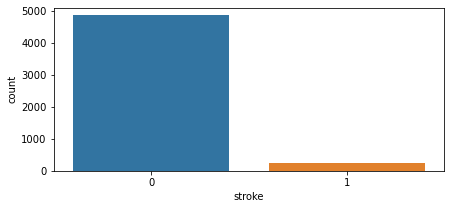

In [67]:
sns.countplot(x="stroke",data=df)

In [22]:
df.stroke.value_counts()/df.shape[0]

0    0.951272
1    0.048728
Name: stroke, dtype: float64

<b>Note</b>: Data imbalance is present in this dataset, with less than 5% in the minority class

####  Visualise distribution of continuous data: Box plot and density plot

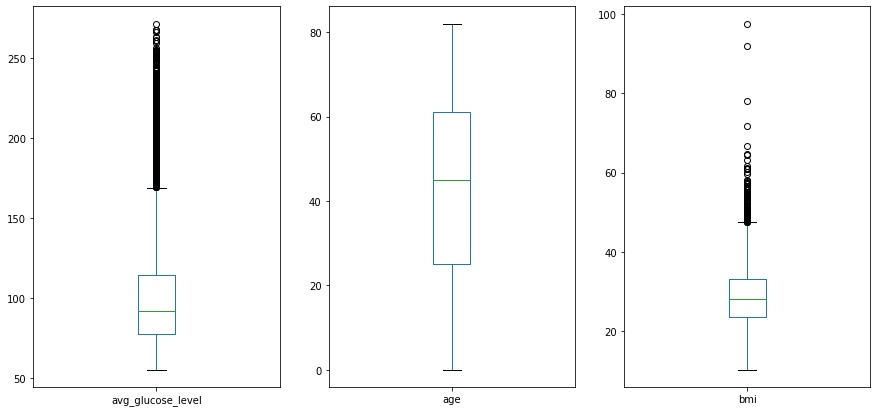

In [44]:
plt.rcParams["figure.figsize"] = (15,7)
df[con_data].plot(kind="box",subplots=True,sharex=False,sharey=False)  # boxplot
# df[con_data].plot(kind="density",subplots=True,sharex=False,sharey=False) # density plot
plt.show()

<b>Note</b>: Many statistical tests and ML algorithms have an implicit assumption on normality. From the plotted distribution, it's clear that none of the variables above is normally distributed. Let's confirm this with a couple of statistical tests.  

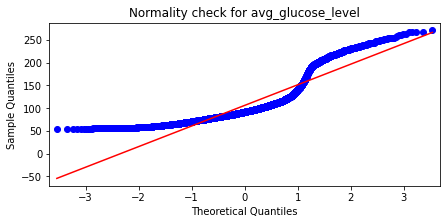

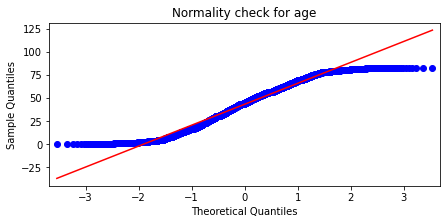

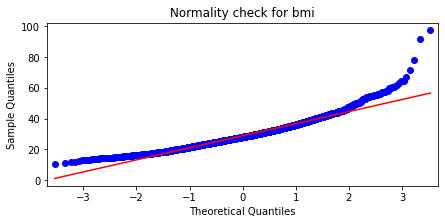

In [45]:
# Note for qqplot test: only non na values can be plot, line feature is disabled if there are nas
plt.rcParams["figure.figsize"] = (7,3)
for i in con_data:
    qqplot(df[~df[i].isna()][i].values,line="s");
    plt.title(f"Normality check for {i}")
    plt.show()

In [46]:
# Use of popular statistical testing for normality check
# Note most packages cannot easily deal with na, exclude in process
for i in con_data:
    normality_test(df[~df[i].isna()][i].values,i,test="anderson",alpha=0.05)

H0: The population is normally distributed
Reject H0: the distribution of avg_glucose_level is NOT normally distributed.
H0: The population is normally distributed
Reject H0: the distribution of age is NOT normally distributed.
H0: The population is normally distributed
Reject H0: the distribution of bmi is NOT normally distributed.


/Users/nbngu/Documents/Python learning/Machine learning material/all_projects/customised_functions\statistical_test.py:43: UserWarning: if test=anderson, no value is returned. Interpretation of result is different from shapiro and d'agnostino.
  warnings.warn("if test=anderson, no value is returned. Interpretation of result is different from shapiro and d'agnostino.")


<b>Note</b>: Using both qqplot and statistical testing, we have confirmed that our continuous variables are not normally distributed. This information is useful in subsequent application of statistical methods such as standardisation of input variables using standardiser or checking on certain validity of imputation methods. <br>

Many ML algorithms assume normality however, these still work well even when normality assumption is broken:
- Common ML models that have an explicit assumption of bi/multivariate normality (not-exhaustive): Linear Discriminant Analysis, Gaussian Naive Bayes, Linear Regression
- Common ML models that do not assume normality: tree-based algorithms such as DecisionTree, boosting algorithms such as XGboost, Catboost
- In the case of linear regression, normality of random error is assumed without the assumption of input variables being normally distributed

#### Visualise distribution of categorical data: countplot or pie charts

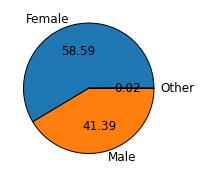

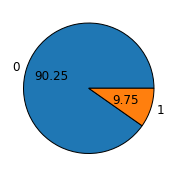

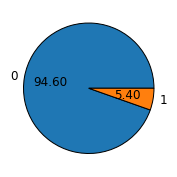

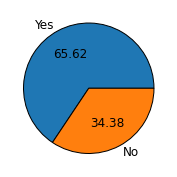

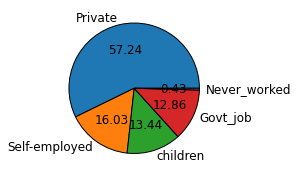

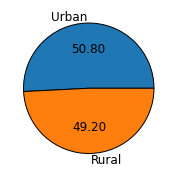

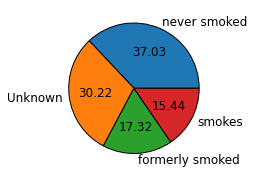

In [65]:
# plt.rcParams["figure.figsize"] = (5,5)
for i in cat_data: 
    # Count plot 
#     sns.countplot(x=i,data=df,order = df[i].value_counts().index)
#     ratio = df[i].value_counts()*100/df[i].shape[0]
#     # Add annotation to the plot
#     for k,j,t in zip(range(df[i].nunique()),ratio,df[i].value_counts()):
#         plt.text(k,t+30, f'{j:.0f}%', 
#                 horizontalalignment='center', color='Black', fontsize=12)

    # Instead of bar charts, a pie chart can also be useful    
    plt.pie(x=df[i].value_counts(), autopct="%.2f", labels=df[i].value_counts().index,radius=1, wedgeprops={'linewidth' : 1, 'edgecolor' : 'k' }, 
            textprops=dict(fontsize=12))
    plt.show()

### Pairwise visualisation: Explore visually the relationship between input variables and target variable

#### Categorical variables and target variable
- Countplot function in seaborns enables clustered bar charts to be plotted. However, in some cases stacked bar charts can help spot differences across groups better. Here we will look at both methods of visualisation pairwise categorical variables

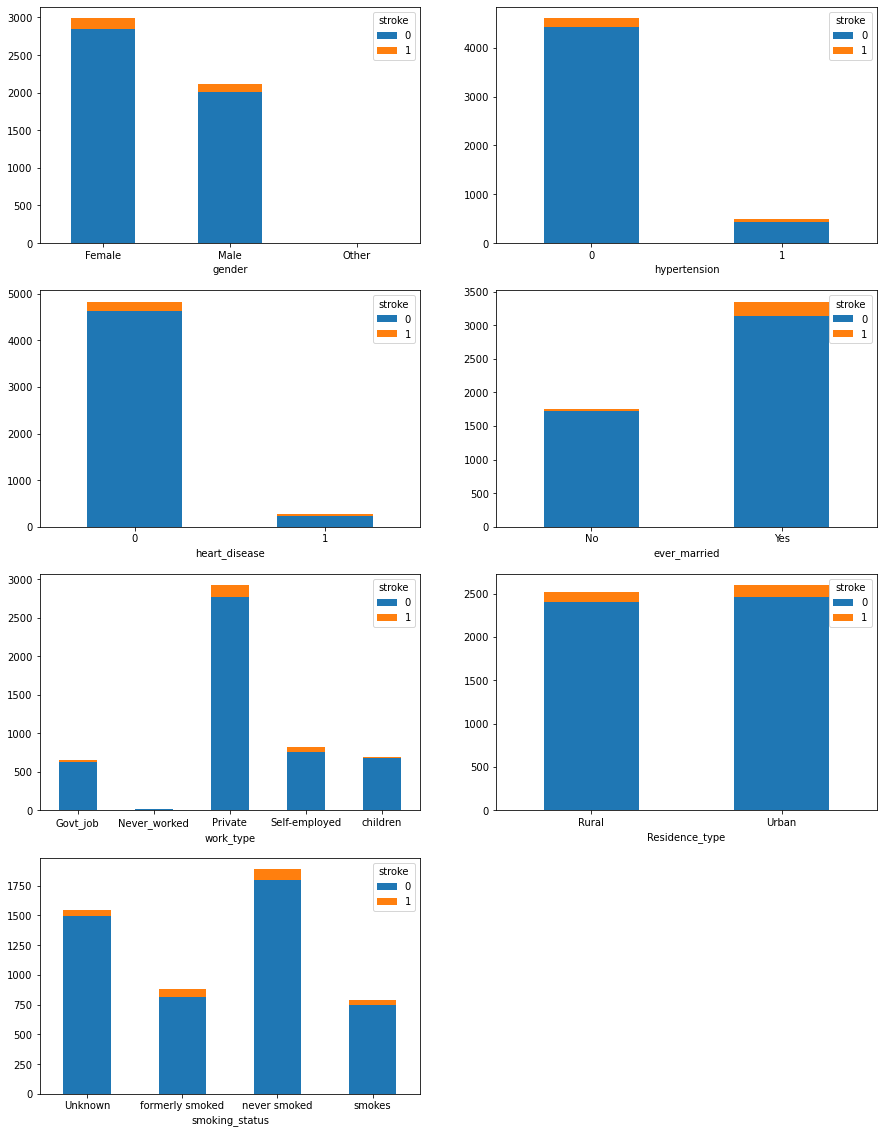

In [48]:
# Clustered barcharts vs stacked barcharts
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(15,20))
ax[3,1].axis("off")
# plt.rcParams["figure.figsize"] = (10,10)

# Iterate through all axes
i = 0
for ax in ax.flatten()[0:7]:
# Slower method but get stacked more easily
    df_trial = df.groupby([cat_data[i],"stroke"]).size().reset_index().pivot(columns="stroke", index=cat_data[i], values=0)
    df_trial.plot(kind="bar",stacked=True,ax=ax)
    ax.set_xlabel(cat_data[i])
    ax.set_xticklabels(df_trial.index, rotation = 0)
    i += 1

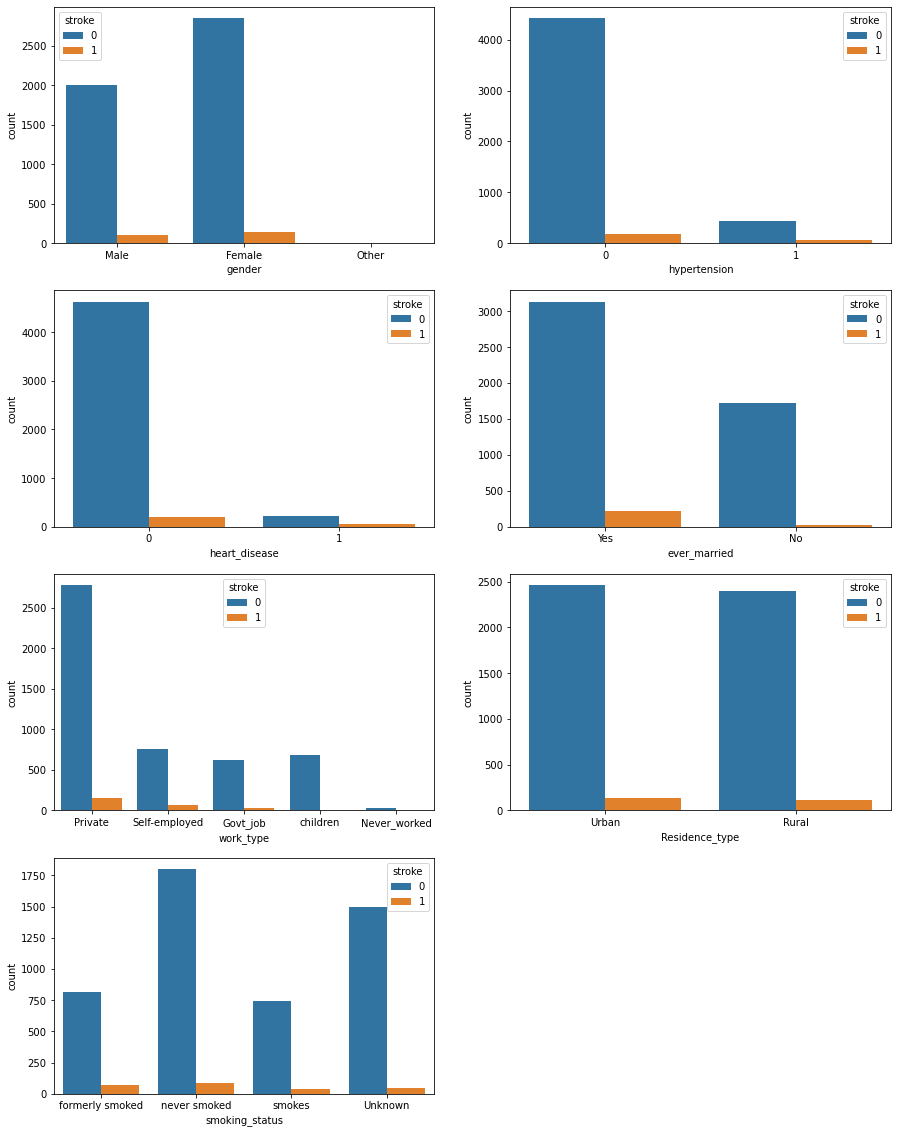

In [49]:
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(15,20))
ax[3,1].axis("off")
# plt.rcParams["figure.figsize"] = (10,10)

# Iterate through all axes
i = 0
for ax in ax.flatten()[0:7]:
    sns.countplot(data=df,x=cat_data[i],hue="stroke",ax=ax) 
    ax.set_xlabel(cat_data[i])
    i += 1

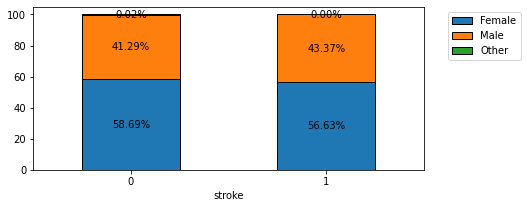

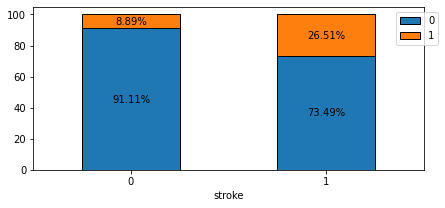

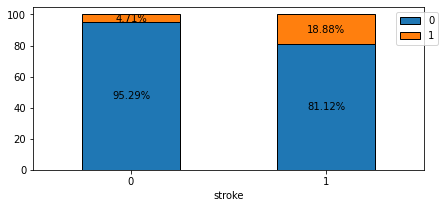

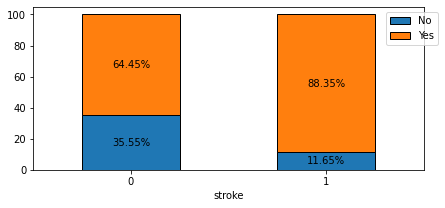

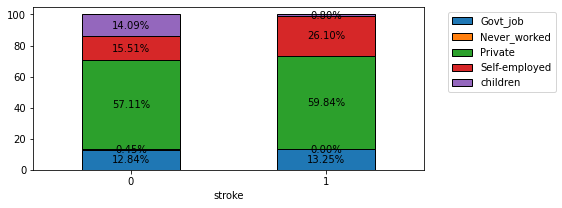

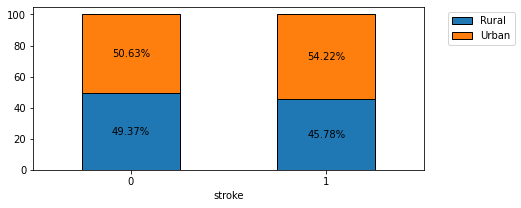

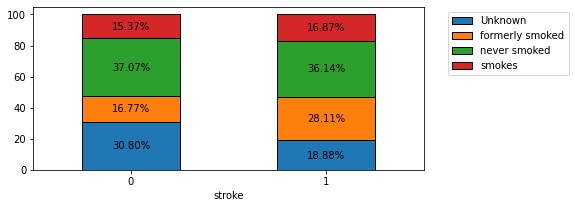

In [50]:
# Using 100% bar chart
for i in cat_data:
    prob = pd.crosstab(index=df[target],columns=df[i],normalize="index")# turn into percentage
    prob=prob*100
    prob.plot.bar(rot=0, stacked=True, edgecolor="k")

    for j in prob.index:
        for cs, z in zip(prob.iloc[j,:].cumsum(), prob.iloc[j,:]):
            plt.text(j,cs-z/2, f'{z:.2f}%', va = 'center', ha = 'center')

    plt.legend(bbox_to_anchor=(1.05, 1))

###### Note
1. Across all categorical variables, the presence of stroke = 1 is significantly less than stroke = 0. Imbalance data is present for the response variable
2. In gender, Other sub_cat has 1 member, not sufficient to be in test, and train sets. Will be dropped
3. smoking_status has a category of "Unknown" which is technically missing data. Strategies to deal with this will be considered later

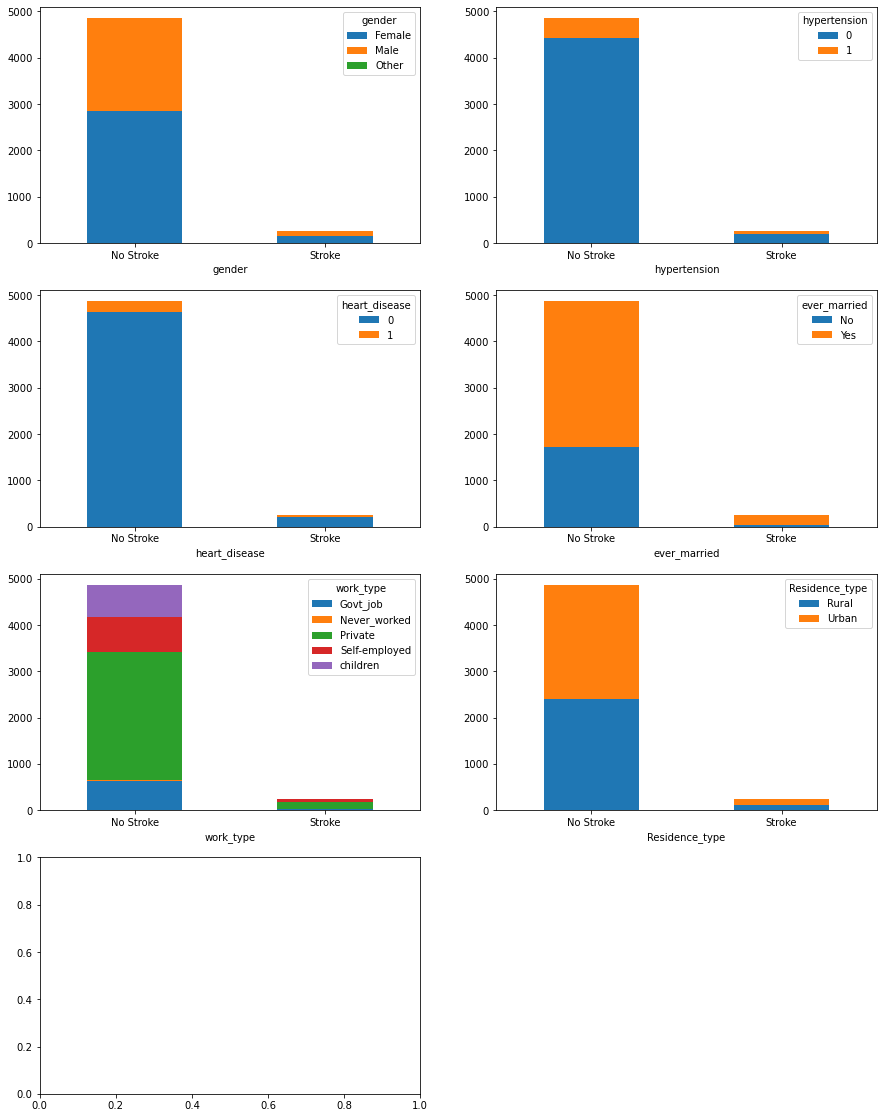

In [51]:
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(15,20))
ax[3,1].axis("off")
# Iterate through all axes
i = 0
for ax in ax.flatten()[0:len(cat_data)-1]:
    df_trial = df.groupby([cat_data[i],"stroke"]).size().reset_index().pivot(columns=cat_data[i], index="stroke", values=0)
    df_trial.plot(kind="bar",stacked=True,ax=ax)
    ax.set_xlabel(cat_data[i])
    ax.set_xticklabels(["No Stroke","Stroke"],rotation=360)
    i += 1

Note: Focusing on distribution of subgroup amongst the people who suffered from stroke. Out of all people who have been recorded to have had a stroke in the sample:
- Most have had no hypertension or heart disease
- Most have been married at least once
- Most worked in the private sector
- The unknown category in smoking_status is too large to make any conclusion here

#### Continuous variables and target variable
- Using violin plot to see both the data distribution and potentially identify outliers

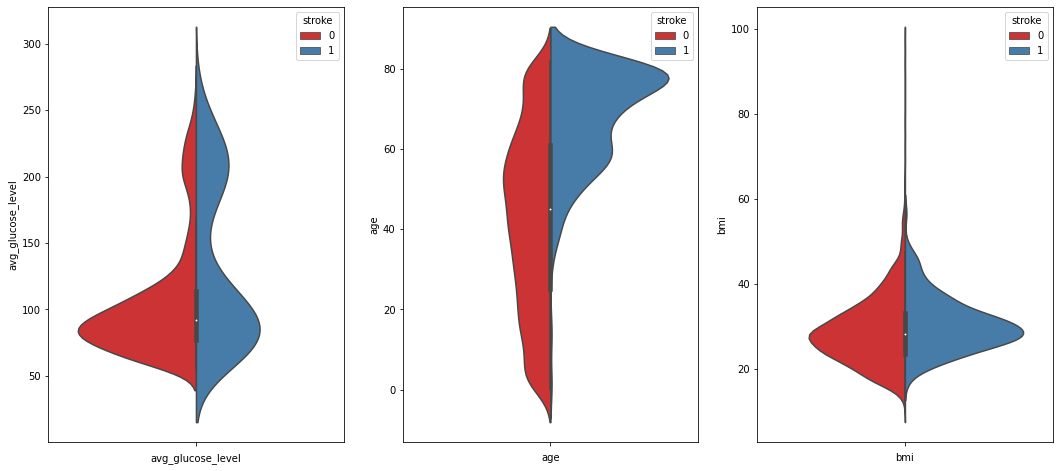

In [52]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=[18,8])

df["nn"] = ""  # this is for plotting purposes only
i = 0
for ax in axes.flatten():
    sns.violinplot(x="nn",y=con_data[i],data=df,hue="stroke", split=True,ax=ax,
                   palette="Set1")   ####### scale="count"
    ax.set_xlabel(con_data[i])
    i += 1
df.drop(labels="nn",axis=1,inplace=True)

##### Note: 
These plots do not show the relative difference in terms of volume across the subtype, only the relative distribution
1. BMI has a significant amount of outliers, although the distribution of values within the IQR seems normal
2. Age: Distribution of people who suffered from strokes skewed towards older people, i.e. most people who suffered from strokes are above 40 years old
3. No obvious relation between ave_glucose_level and bmi with probability of having strokes

### 3 variable visualisation for multivariate relationship
- Jointplots, facetplots and scatterplots are useful in displaying relationship amongst 3 continous and categorical variables

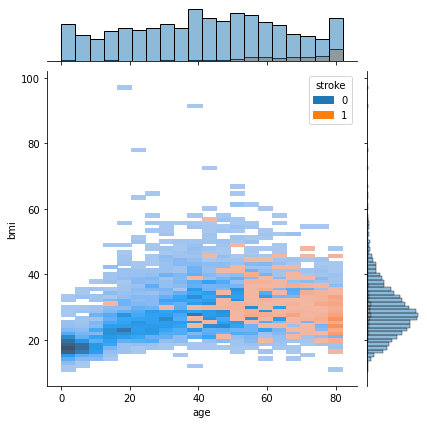

In [53]:
# With the use of hue, only kind = ["kde","scatter","hist"] is supported
# For 2 continuous variables, kind="kde" or "hist" can be useful
# Interpretation: for kde plot, smaller circles, for hist plot, darker cells mean higher density, i.e. more values

# For 2 continuous and one categorical variables, hist and kde can be useful
sns.jointplot(data=df, x='age', y='bmi', hue='stroke', kind='hist')

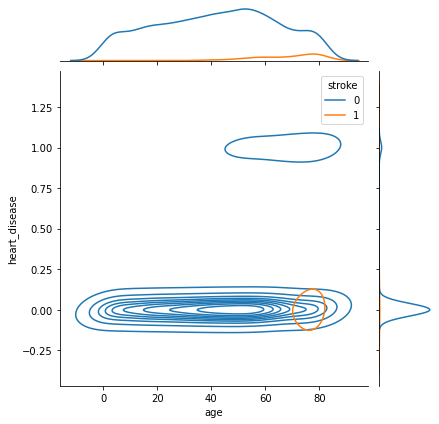

In [54]:
# For 1 continuous and 2 categorical variables -> "kde" is better
sns.jointplot(data=df, x='age', y='heart_disease', hue='stroke', kind="kde")

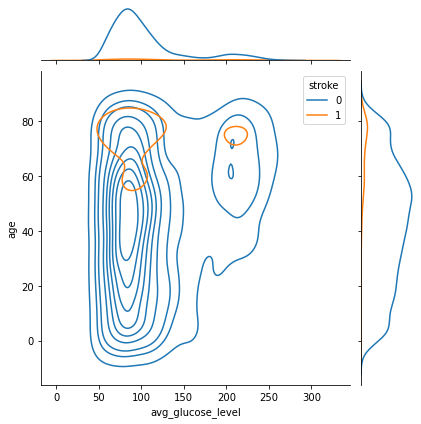

In [55]:
sns.jointplot(data=df, x='avg_glucose_level', y='age', hue='stroke', kind="kde")

In this case, we can see that:
- The majority of people who have heart dieases are aged 40 or above
- Most of the people who suffered from stroke but did not have heart diseases are people above 70 years old
- Most of the people who suffered from stroke are above 40 and have a range of bmi from 20-40. However, there seems to be a concentration of stroke cases with bmi around 30 and aged around 80 

### More than 3 variable visualisation
Use FacetGrid for visualisation: 
- Plotting continuous variables using scatterplot while displaying more granularity of other categorical variables 

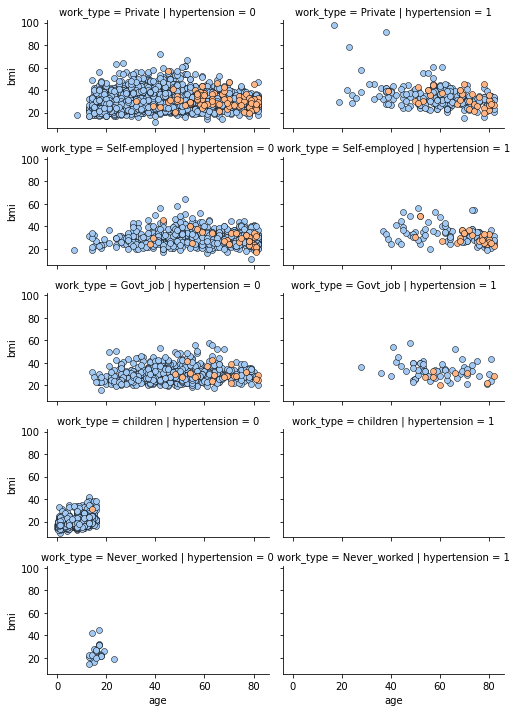

In [68]:
mul = sns.FacetGrid(data=df, row='work_type', col='hypertension', hue='stroke',
                  height=2,aspect=1.8,palette="pastel")
mul.map(sns.scatterplot, 'age',"bmi",edgecolor='k', lw=0.1)

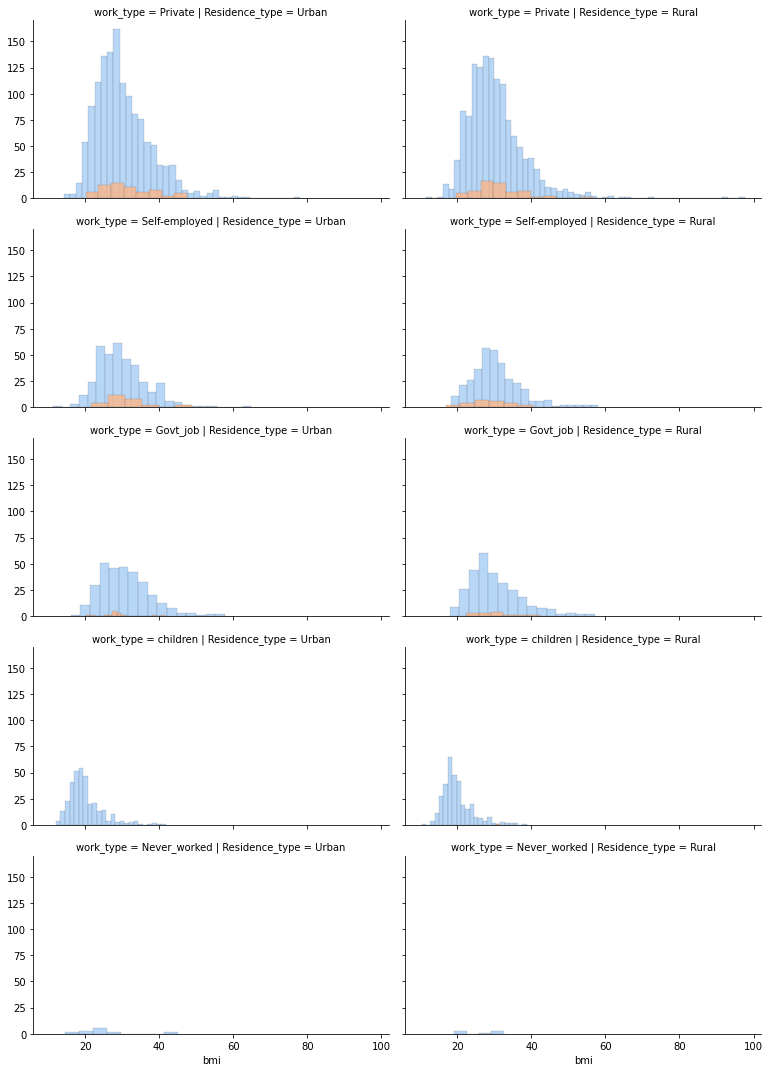

In [69]:
mul = sns.FacetGrid(data=df, row='work_type', col='Residence_type', hue='stroke',
                  height=3, aspect = 1.8, palette="pastel")
mul.map(sns.histplot,"bmi",edgecolor='k', lw=0.1)

### 5. Bivariate analysis: correlation amongst variables
- Correlation matrix: finding linear relationship between continuous variables
- Independence test for categorical variables
- pointserial test for continuous and categorical variables

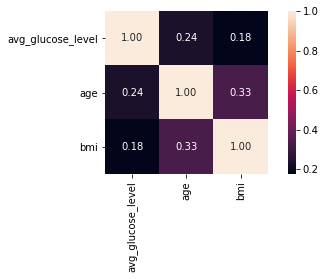

In [58]:
### Continuous data
df0 = df[~df.isna().any(axis=1)]
cm = np.corrcoef(df0[con_data].values.T)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt=".2f",yticklabels=con_data,xticklabels=con_data)

In [59]:
# Example of checking for continous data only to input into cramersv
mat,ax = generate_sym_matrix(df0,con_data,test="cramersv",threshold=0.05)

AssertionError: Cramers only works for categorical data. Check input data or increase threshold to bypass categorical data check

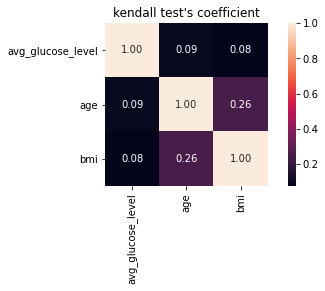

In [60]:
mat,ax = generate_sym_matrix(df0,con_data,test="kendall")

In [61]:
# Correlation between binary (dichotomous) variable and continuous variable
for i in con_data:
    pbc,p_pbc = correlation(df0["stroke"].values, df0[i].values,["stroke",i],
                            test="pointbiserial",alpha=0.05,print_result=True)

H0: The two variables are not correlated
Reject H0: stroke and avg_glucose_level are correlated with  p=0.000
H0: The two variables are not correlated
Reject H0: stroke and age are correlated with  p=0.000
H0: The two variables are not correlated
Reject H0: stroke and bmi are correlated with  p=0.003


In [62]:
# Correlation between continuous variables
for i in con_data:
    pbc,p_pbc = correlation(df0["bmi"].values, df0[i].values,["stroke",i],
                            test="kendall",alpha=0.05,print_result=True)

H0: The two variables are not correlated
Reject H0: stroke and avg_glucose_level are correlated with  p=0.000
H0: The two variables are not correlated
Reject H0: stroke and age are correlated with  p=0.000
H0: The two variables are not correlated
Reject H0: stroke and bmi are correlated with  p=0.000


In [63]:
# Correlation between categorical variables
for i in cat_data:
    pbc,p_pbc,eff = cramers_v(df0["stroke"].values, df0[i].values,X_name=["stroke",i],
                          alpha=0.05,print_result=True)

col_0  Female  Male  Other
row_0                     
0        2777  1922      1
1         120    89      0
No association between stroke and gender
col_0     0    1
row_0           
0      4309  391
1       149   60
stroke is dependent on hypertension with p = 0.000
With a small effect size v = 0.14 for dof = 1
col_0     0    1
row_0           
0      4497  203
1       169   40
stroke is dependent on heart_disease with p = 0.000
With a small effect size v = 0.14 for dof = 1
col_0    No   Yes
row_0            
0      1682  3018
1        23   186
stroke is dependent on ever_married with p = 0.000
With a small effect size v = 0.10 for dof = 1
col_0  Govt_job  Never_worked  Private  Self-employed  children
row_0                                                          
0           602            22     2684            722       670
1            28             0      127             53         1
stroke is dependent on work_type with p = 0.000
With a small effect size v = 0.09 for dof = 1
c

In [64]:
cramers_interpretation = pd.DataFrame(data={"Dof":[1,2,3],"Small effect":[0.1,0.07,0.06],"Medium effect":[0.3,0.21,0.17],
                                      "Large effect":[0.5,0.35,0.29]})
cramers_interpretation 

,Dof,Small effect,Medium effect,Large effect
0,1,0.10,0.30,0.50
1,2,0.07,0.21,0.35
2,3,0.06,0.17,0.29


Note:
- Not all categorical data have a degree of association with stroke tendency
- gender,'Residence_type' do not have any associatation with stroke tendency 
- Of the categorical data that are associated with stroke, they all have quite small association level. Note here true interpretation of cramers v needs to take into account the degree of freedom
- Interestingly, ever_married, work_type and smoking_status has strong association